In [ ]:
#Lanke Payal Sambhaji 
#Roll No: 152
#Class: TYIT

In [6]:
# COMMON IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)

from xgboost import XGBClassifier, XGBRegressor, plot_tree, plot_importance

In [ ]:
#Classification

In [8]:
# Load Dataset
titanic = pd.read_csv("Titanic-Dataset.csv")

In [9]:
#Data preprocessing 
titanic.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

le = LabelEncoder()
titanic["Sex"] = le.fit_transform(titanic["Sex"])
titanic["Embarked"] = le.fit_transform(titanic["Embarked"])

X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

C:\Users\HP\AppData\Local\Temp\ipykernel_20848\1940662374.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_20848\1940662374.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [10]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# XGBoost Classifier (Ensemble of Decision Trees)
xgb_clf = XGBClassifier(
    objective="binary:logistic",
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,          # tree pruning
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=1.0,    # L2 regularization
    random_state=42,
    eval_metric="logloss"
)

xgb_clf.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [12]:
# Evaluation Metrics (Classification)
y_pred = xgb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Precision: 0.7796610169491526
Recall: 0.6666666666666666
F1 Score: 0.71875

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



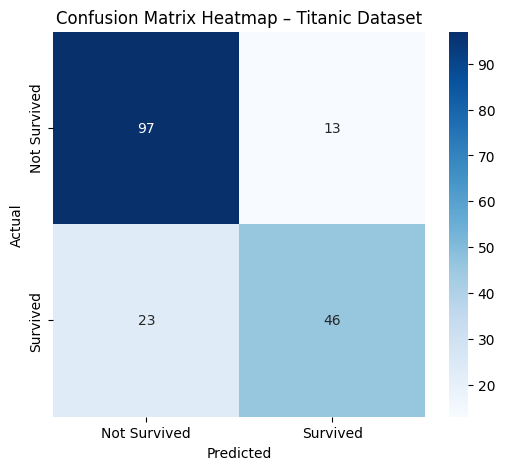

In [13]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Not Survived", "Survived"],
    yticklabels=["Not Survived", "Survived"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap – Titanic Dataset")
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\plotting.py:268: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


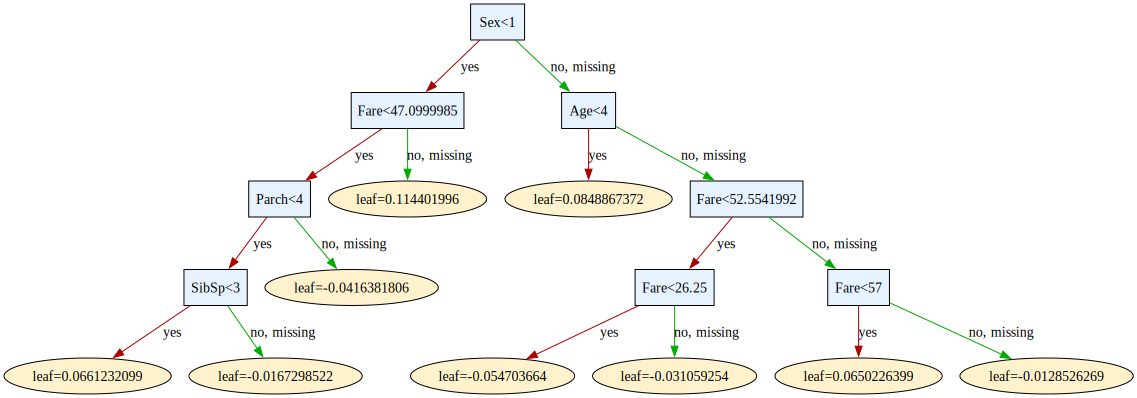

In [27]:
#  Decision Tree Visualization
from xgboost import to_graphviz

tree = to_graphviz(
    xgb_clf,
    num_trees=0,        # first tree
    rankdir="TB",   # Top to Bottom (vertical)      
    yes_color="#00AA00",
    no_color="#AA0000",
    condition_node_params={
        "shape": "box",
        "style": "filled",
        "fillcolor": "#E6F2FF"
    },
    leaf_node_params={
        "shape": "ellipse",
        "style": "filled",
        "fillcolor": "#FFF2CC"
    }
)

tree

<Figure size 1000x600 with 0 Axes>

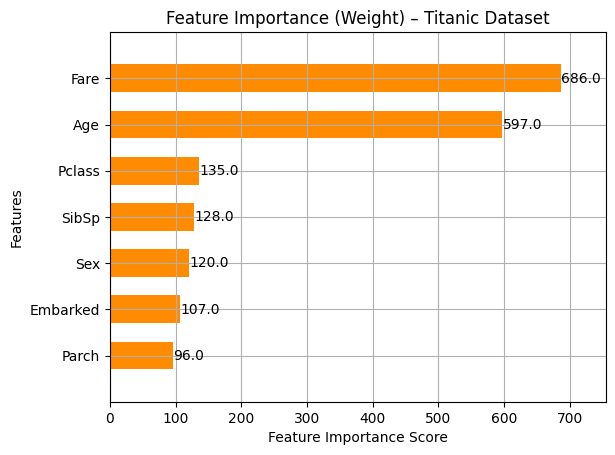

In [17]:
plt.figure(figsize=(10, 6))
plot_importance(
    xgb_clf,
    importance_type="weight",   # alternatives: gain, cover, weight
    max_num_features=10,
    height=0.6,
    color="darkorange"
)
plt.title("Feature Importance (Weight) – Titanic Dataset")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
#Regression


In [ ]:
# Load Dataset
housing = pd.read_csv("Housing.csv")

In [ ]:
# Data Preprocessing
categorical_cols = housing.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    housing[col] = LabelEncoder().fit_transform(housing[col])

X = housing.drop("price", axis=1)
y = housing["price"]

In [ ]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# XGBoost Regressor (Ensemble of Decision Trees)
xgb_reg = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.2,          # pruning
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

xgb_reg.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [ ]:
# Evaluation Metrics (Regression)
y_pred = xgb_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1002529.625
MSE: 1882340196352.0
RMSE: 1371984.036478559
R2 Score: 0.627596378326416


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\plotting.py:268: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


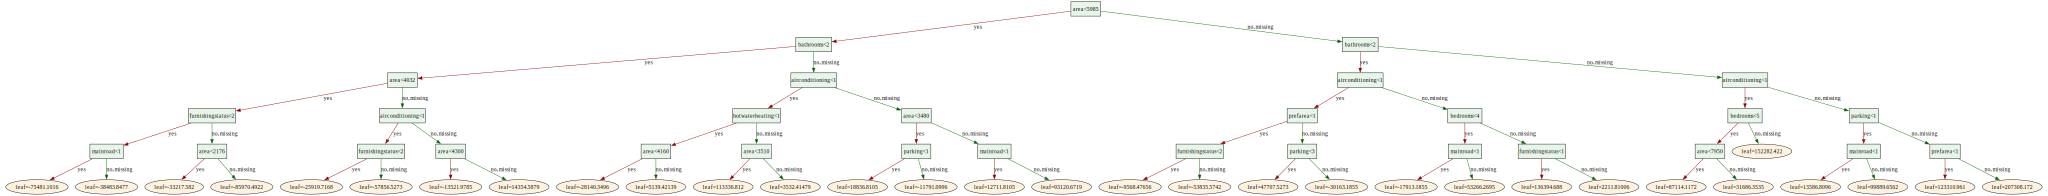

In [29]:
# Decision Tree Visualization (Regression)
# Decision Tree Visualization (Regression)
from xgboost import to_graphviz

tree_reg = to_graphviz(
    xgb_reg,            # REGRESSION MODEL
    num_trees=0,        # first tree
    rankdir="TB",       # Top to Bottom (vertical)
    yes_color="#006400",
    no_color="#8B0000",
    condition_node_params={
        "shape": "box",
        "style": "filled",
        "fillcolor": "#E8F5E9"   # light green
    },
    leaf_node_params={
        "shape": "ellipse",
        "style": "filled",
        "fillcolor": "#FFF3E0"   # light orange
    }
)

tree_reg

<Figure size 1000x600 with 0 Axes>

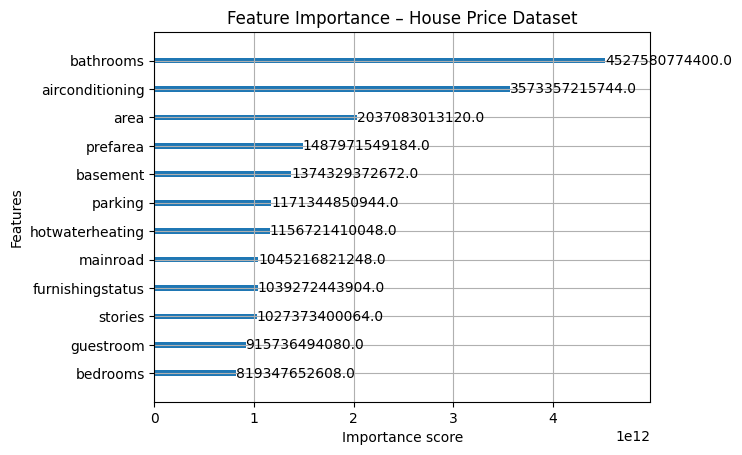

In [ ]:
# Feature Importance (Regression)
plt.figure(figsize=(10, 6))
plot_importance(xgb_reg, importance_type="gain")
plt.title("Feature Importance – House Price Dataset")
plt.show()

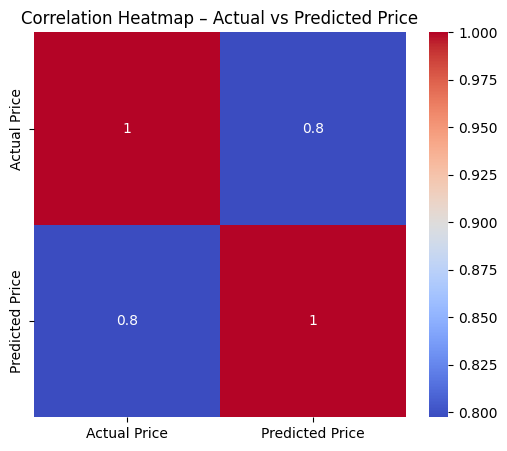

In [ ]:
# Heatmap – Actual vs Predicted Prices
results = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred
})

plt.figure(figsize=(6, 5))
sns.heatmap(results.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap – Actual vs Predicted Price")
plt.show()

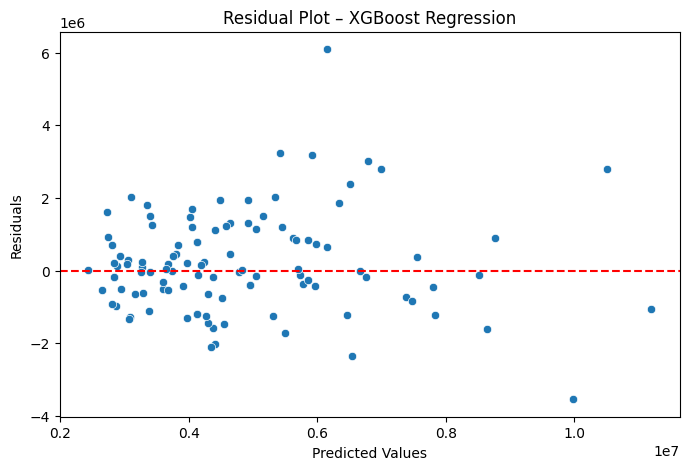

In [ ]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot – XGBoost Regression")
plt.show()